<a href="https://colab.research.google.com/github/shekharkoirala/machinelearning_algorithms_analysis/blob/master/tf/tf_imagespart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.reset_default_graph()

In [0]:
image_name = tf.read_file("image.jpg")
image_decoded = tf.image.decode_image(image_name)
image = tf.cast(image_decoded, tf.float32)/266.0

In [109]:
image[:,:,1]

array([[0.15789475, 0.22556391, 0.2518797 , ..., 0.18421052, 0.15037595,
        0.05263158],
       [0.13157895, 0.17669174, 0.22556391, ..., 0.19924812, 0.22932331,
        0.23684211],
       [0.20676692, 0.22556391, 0.21804512, ..., 0.19924812, 0.23308271,
        0.2631579 ],
       ...,
       [0.0112782 , 0.0112782 , 0.0075188 , ..., 0.0112782 , 0.0075188 ,
        0.0037594 ],
       [0.0075188 , 0.0075188 , 0.0075188 , ..., 0.0112782 , 0.0075188 ,
        0.0037594 ],
       [0.0075188 , 0.0075188 , 0.0075188 , ..., 0.01503759, 0.0075188 ,
        0.0037594 ]], dtype=float32)

In [0]:
with tf.Session() as sess:
  image = sess.run(image)

In [99]:
image.shape

(4000, 3000, 3)

In [100]:
image[:,:,0].shape , image[:,:,1].shape , image[:,:,2].shape

((4000, 3000), (4000, 3000), (4000, 3000))

In [0]:
gy_image = tf.image.rgb_to_grayscale(image)
with tf.Session() as sess:
  gy_image = sess.run(gy_image)

In [0]:
r_image = image.copy()
r_image[:,:,1] = 0
r_image[:,:,2] = 0

In [0]:
b_image = image.copy()
b_image[:,:,0] = 0
b_image[:,:,2] = 0

g_image = image.copy()
g_image[:,:,0] = 0
g_image[:,:,1] = 0

In [0]:
import matplotlib.pyplot as plt
from matplotlib import gridspec as gridspec

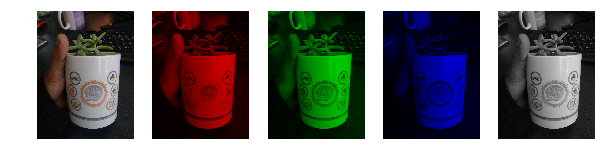

In [132]:
def plot(images,  filename, rgb = True):
  fig1 = plt.figure(figsize = (10,10)) 
  gs = gridspec.GridSpec(1, len(images)) # grid spaceof image
  for i , image in enumerate(images):
    ax1 = fig1.add_subplot(gs[0,i])
    if image.shape[2] == 3:
      ax1.imshow(image)
    else:
      image = image.reshape(image.shape[0], image.shape[1])
      ax1.imshow(image, cmap='gray')
    plt.axis("off")
  plt.show()
  fig1.savefig(filename, dpi = 1000)

images = [image, r_image, b_image, g_image, gy_image]
plot(images, "colors.png", True)

In [0]:
mean_grey = gy_image.copy()
lum_grey = gy_image.copy()

In [0]:
mean_grey[:,:,0] = (image[:,:,0] + image[:,:,1] + image[:,:,2]) / 3

In [0]:
lum_grey[:,:,0] =  0.07*image[:,:,0] + 0.72*image[:,:,1] + 0.21*image[:,:,2]

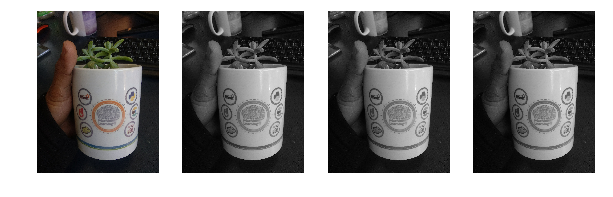

In [133]:
images = [image, gy_image, mean_grey, lum_grey]
plot(images, "bnw.png", True)